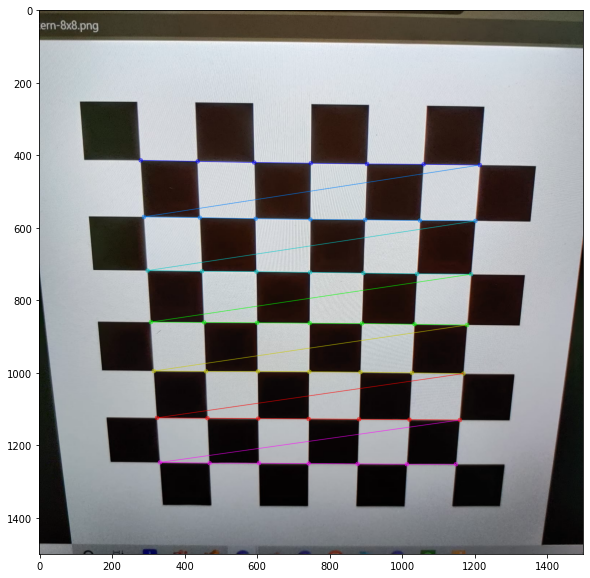

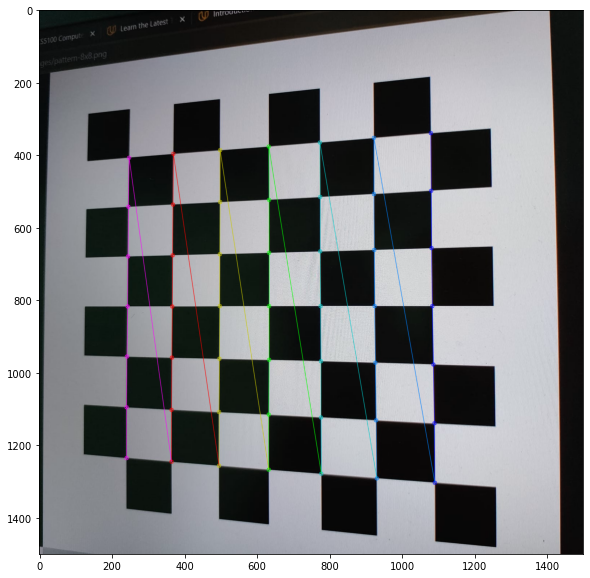

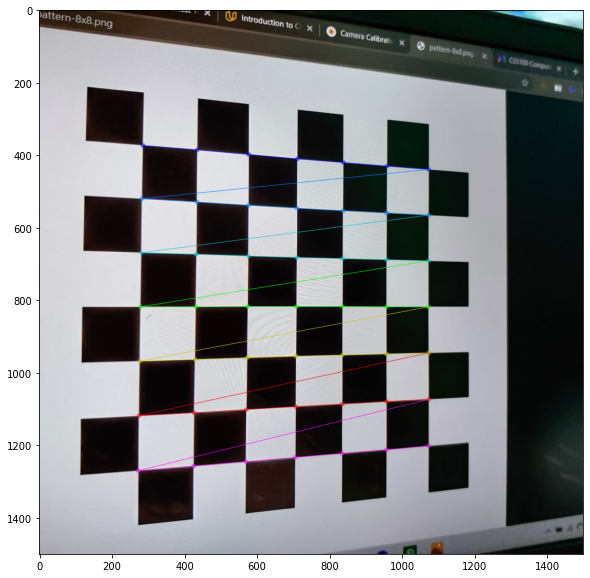

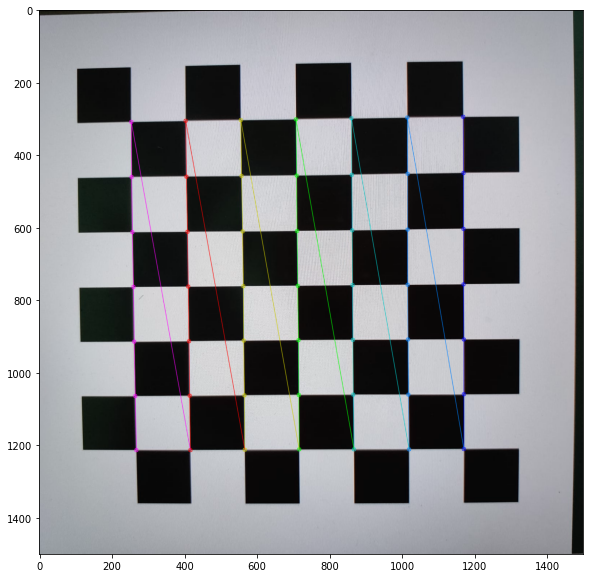

Camera matrix : 

[[1.61206650e+03 0.00000000e+00 7.74660329e+02]
 [0.00000000e+00 1.61088036e+03 7.36275076e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coeffecients : 

[[ 2.58414586e-01 -1.88537787e+00 -1.07564196e-03  9.89191851e-04
   4.14168958e+00]]
Rotation Vectors : 

[array([[ 0.25613164],
       [-0.0114251 ],
       [ 0.01159868]]), array([[0.18305705],
       [0.2472931 ],
       [1.55051906]]), array([[-0.03062404],
       [-0.33171316],
       [ 0.01113551]]), array([[ 0.03169155],
       [-0.00329338],
       [ 1.56177902]])]
Translation Vectors : 

[array([[-3.16257876],
       [-2.05251654],
       [10.40862445]]), array([[ 1.92337663],
       [-2.5011092 ],
       [10.279893  ]]), array([[-3.29587514],
       [-2.45134425],
       [10.9821076 ]]), array([[ 2.56395833],
       [-2.8716033 ],
       [10.60373697]])]


In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

chessboard = (7,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objpoints = []
imgpoints = [] 

objp = np.zeros((1, chessboard[0] * chessboard[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:chessboard[0], 0:chessboard[1]].T.reshape(-1, 2)

images = glob.glob('./images/*.jpeg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, chessboard)
    if ret == True:
        objpoints.append(objp)
        refinedcorners = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        imgpoints.append(refinedcorners)
        img = cv2.drawChessboardCorners(img, chessboard, refinedcorners, ret)

    plt.figure(figsize = (10,10))
    plt.imshow(img)
    plt.show()
    cv2.waitKey(500)
cv2.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("distortion coeffecients : \n")
print(dist)
print("Rotation Vectors : \n")
print(rvecs)
print("Translation Vectors : \n")
print(tvecs)